<a href="https://colab.research.google.com/github/Griff-Kaiga/Hypothyroid-prediction/blob/main/Model__for_hypothyroid_identification_based__on_a_patient's_symptoms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Defining the Question


Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

Specifying the Question

Part 1: Decision trees:

For this section, you should build a model that makes the above prediction. You should not use individual decision trees, rather you should use at least 2 out of the 3 advanced models we have studied: Random forests, Ada boosted trees, and gradient boosted trees.
Try and optimize each of the 2 models, making sure to document how you've set up your hyperparameters.
Identify which of the 2 models you trust most, and use your model to determine which features are most impactful in influencing the prediction
Note that with decision trees, you don't need to do a lot of data cleaning. This will be very different with SVM.
Part 2: SVM:

In this section, you may be required to clean the data a little bit so as to make sense of the features.

Document what transformation you've done on the data.

Apply Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best.

 Defining the Metric for Success

The project will be considered a success once a models that are able to acertain whether or not a patient has hyperthyroid.

Understanding the context

Hyperthyroidism (overactive thyroid) occurs when your thyroid gland produces too much of the hormone thyroxine. Hyperthyroidism can accelerate your body's metabolism, causing unintentional weight loss and a rapid or irregular heartbeat. You’re at higher risk for hyperthyroidism if you:

Are over the age of 60
Were pregnant within the past 6 months
Had thyroid surgery or a thyroid problem such as a goiter
Third-generation thyroid-stimulating hormone (TSH) assays are readily available and are generally the most sensitive screening tool for primary hypothyroidism. The generally accepted reference range for normal serum TSH is 0.40-4.2 mIU/L.
The normal range for the T3 is 100–200 nanograms of hormone per deciliter of blood (ng/dL). Abnormally high levels most commonly indicate a condition called Grave's disease.
A thyroxine test measures the level of thyroxine (T4) in the blood. Too much or too little T4 can indicate thyroid disease.

Recording the Experimental Design

The order for the project is as follows:

Data reading

checking the data

tidying the dataset

Exploratory Analysis

Implementing the Solution

In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

In [2]:

#load the data
thyroid = pd.read_csv("/content/hypothyroid (1).csv")


#displaying the dataset
thyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [3]:
# displaying the tail
thyroid.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [4]:
# checking the shape of our data
thyroid.shape

(3163, 26)

In [5]:
# checking out the unique values
thyroid.nunique()

status                         2
age                           93
sex                            3
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
TSH_measured                   2
TSH                          240
T3_measured                    2
T3                            70
TT4_measured                   2
TT4                          269
T4U_measured                   2
T4U                          159
FTI_measured                   2
FTI                          281
TBG_measured                   2
TBG                           53
dtype: int64

In [6]:
# getting information about our data
thyroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

Data Cleaning

In [7]:
# getting a description of the column age
print(thyroid['age'].describe())

count     3163
unique      93
top          ?
freq       446
Name: age, dtype: object


In [8]:
# Replacing the "?" values in the data frame
thyroid.replace('?', np.nan, inplace=True)


In [9]:
# dropping unnecessary columns
thyroid = thyroid.drop(columns=['TBG_measured', 'TBG', 'FTI_measured', 'FTI', 'thyroid_surgery', 'T4U_measured', 'T3_measured'])
# checking the shape of the data set after dropping unecessary columns
thyroid.shape

(3163, 19)

In [10]:
categorical_feature_mask = thyroid.dtypes==object
categorical_cols = thyroid.columns[categorical_feature_mask].tolist()
print(categorical_cols)

['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'query_hypothyroid', 'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre', 'TSH_measured', 'TSH', 'T3', 'TT4_measured', 'TT4', 'T4U']


In [11]:
# converting categorical columns to numerical
thyroid['sex'] = thyroid['sex'].astype('category')
thyroid['sex'] = thyroid['sex'].cat.codes

thyroid['status'] = thyroid['status'].astype('category')
thyroid['status'] = thyroid['status'].cat.codes

thyroid['query_on_thyroxine'] = thyroid['query_on_thyroxine'].astype('category')
thyroid['query_on_thyroxine'] = thyroid['query_on_thyroxine'].cat.codes

thyroid['on_thyroxine'] = thyroid['on_thyroxine'].astype('category')
thyroid['on_thyroxine'] = thyroid['on_thyroxine'].cat.codes

thyroid['on_antithyroid_medication'] = thyroid['on_antithyroid_medication'].astype('category')
thyroid['on_antithyroid_medication'] = thyroid['on_antithyroid_medication'].cat.codes

thyroid['query_hypothyroid'] = thyroid['query_hypothyroid'].astype('category')
thyroid['query_hypothyroid'] = thyroid['query_hypothyroid'].cat.codes

thyroid['query_hyperthyroid'] = thyroid['query_hyperthyroid'].astype('category')
thyroid['query_hyperthyroid'] = thyroid['query_hyperthyroid'].cat.codes

thyroid['pregnant'] = thyroid['pregnant'].astype('category')
thyroid['pregnant'] = thyroid['pregnant'].cat.codes

thyroid['sick'] = thyroid['sick'].astype('category')
thyroid['sick'] = thyroid['sick'].cat.codes

thyroid['tumor'] = thyroid['tumor'].astype('category')
thyroid['tumor'] = thyroid['tumor'].cat.codes

thyroid['lithium'] = thyroid['lithium'].astype('category')
thyroid['lithium'] = thyroid['lithium'].cat.codes

thyroid['goitre'] = thyroid['goitre'].astype('category')
thyroid['goitre'] = thyroid['goitre'].cat.codes

thyroid['TSH_measured'] = thyroid['TSH_measured'].astype('category')
thyroid['TSH_measured'] = thyroid['TSH_measured'].cat.codes

thyroid['T3'] = thyroid['T3'].astype('category')
thyroid['T3'] = thyroid['T3'].cat.codes

thyroid['TSH'] = thyroid['TSH'].astype('category')
thyroid['TSH'] = thyroid['TSH'].cat.codes

thyroid['TT4_measured'] = thyroid['TT4_measured'].astype('category')
thyroid['TT4_measured'] = thyroid['TT4_measured'].cat.codes

thyroid['TT4'] = thyroid['TT4'].astype('category')
thyroid['TT4'] = thyroid['TT4'].cat.codes

thyroid['T4U'] = thyroid['T4U'].astype('category')
thyroid['T4U'] = thyroid['T4U'].cat.codes

thyroid.head()


,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3,TT4_measured,TT4,T4U
0,0,72,1,0,0,0,0,0,0,0,0,0,0,1,134,7,1,55,116
1,0,15,0,1,0,0,0,0,0,0,0,0,0,1,79,18,1,99,81
2,0,24,1,0,0,0,0,0,0,0,0,0,0,1,0,3,1,193,68
3,0,24,0,0,0,0,0,0,0,0,0,0,0,1,158,5,1,219,72
4,0,77,1,0,0,0,0,0,0,0,0,0,0,1,200,13,1,216,96


In [12]:
# Columns with dtype object
columns = thyroid.columns[thyroid.dtypes.eq('object')]
print(columns)
# Convert the columns to numeric 
thyroid[columns] = thyroid[columns].apply(pd.to_numeric, errors='coerce')
# check the changes mad
thyroid.dtypes

Index(['age'], dtype='object')


status                          int8
age                          float64
sex                             int8
on_thyroxine                    int8
query_on_thyroxine              int8
on_antithyroid_medication       int8
query_hypothyroid               int8
query_hyperthyroid              int8
pregnant                        int8
sick                            int8
tumor                           int8
lithium                         int8
goitre                          int8
TSH_measured                    int8
TSH                            int16
T3                              int8
TT4_measured                    int8
TT4                            int16
T4U                            int16
dtype: object

In [13]:
# checking for null values
thyroid.isnull().sum()

status                         0
age                          446
sex                            0
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
query_hypothyroid              0
query_hyperthyroid             0
pregnant                       0
sick                           0
tumor                          0
lithium                        0
goitre                         0
TSH_measured                   0
TSH                            0
T3                             0
TT4_measured                   0
TT4                            0
T4U                            0
dtype: int64

In [14]:
#filling in the missing values for age with the mean
thyroid['age'].fillna(thyroid['age'].mean(), inplace = True)

In [15]:
# checking for outliers
thyroid.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'query_hypothyroid', 'query_hyperthyroid',
       'pregnant', 'sick', 'tumor', 'lithium', 'goitre', 'TSH_measured', 'TSH',
       'T3', 'TT4_measured', 'TT4', 'T4U'],
      dtype='object')

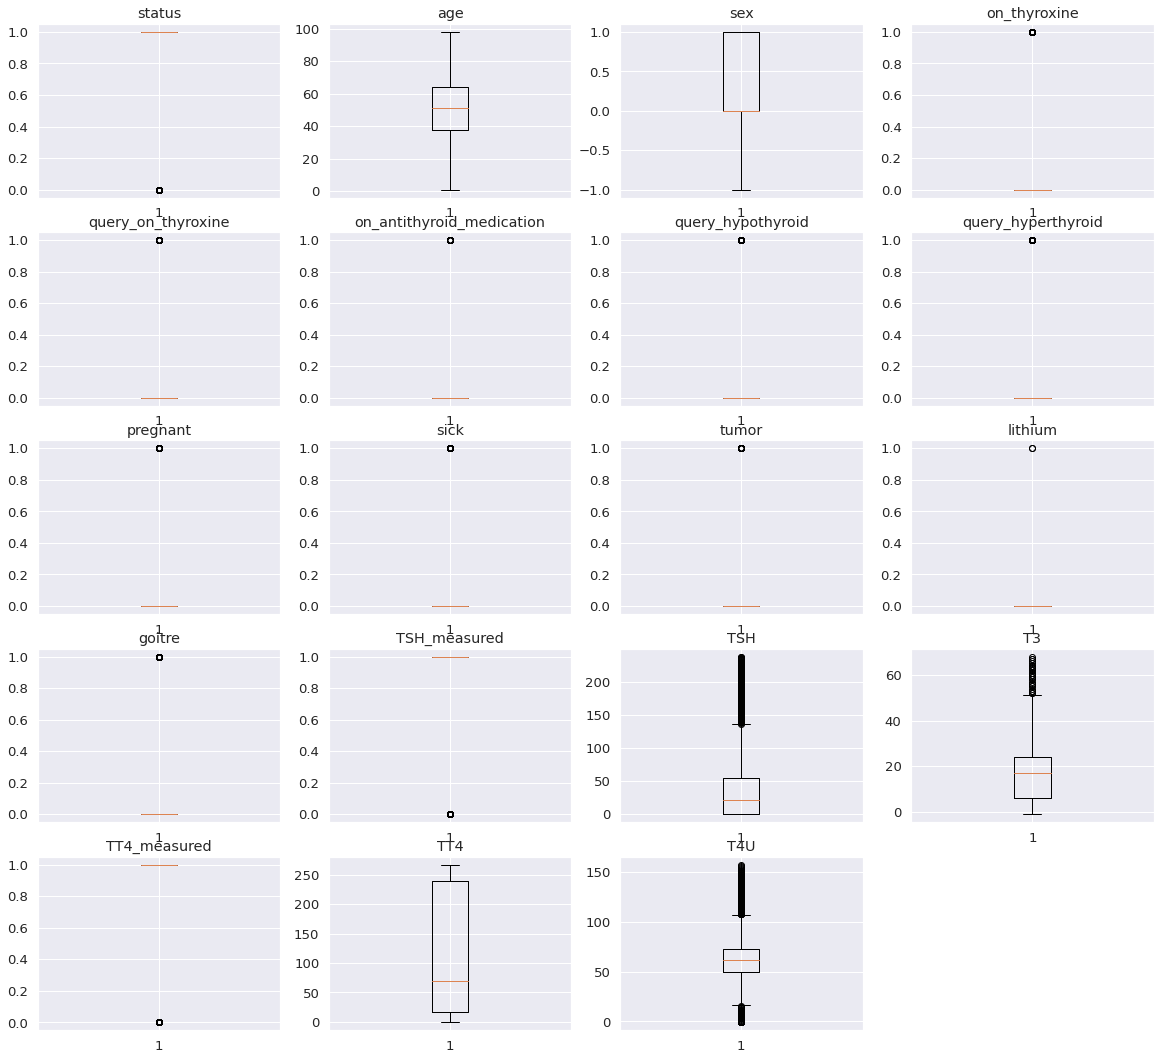

In [16]:
# Checking for Outliers
 
# save the column names onto a dictionary
columns_dict = {'status':1, 'age':2, 'sex':3, 'on_thyroxine':4, 'query_on_thyroxine':5, 'on_antithyroid_medication':6, 
               'query_hypothyroid':7, 'query_hyperthyroid':8, 'pregnant':9, 'sick':10, 'tumor':11, 
                'lithium':12, 'goitre':13, 'TSH_measured':14, 'TSH':15, 'T3':16, 'TT4_measured':17,
                'TT4':18, 'T4U':19}


plt.figure(figsize=(20,30))

# make a boxplot for each numerical column
for variable,i in columns_dict.items():
  plt.subplot(8,4,i)
  plt.boxplot(thyroid[variable])
  plt.title(variable)

plt.show()

Exploratory Data Analysis

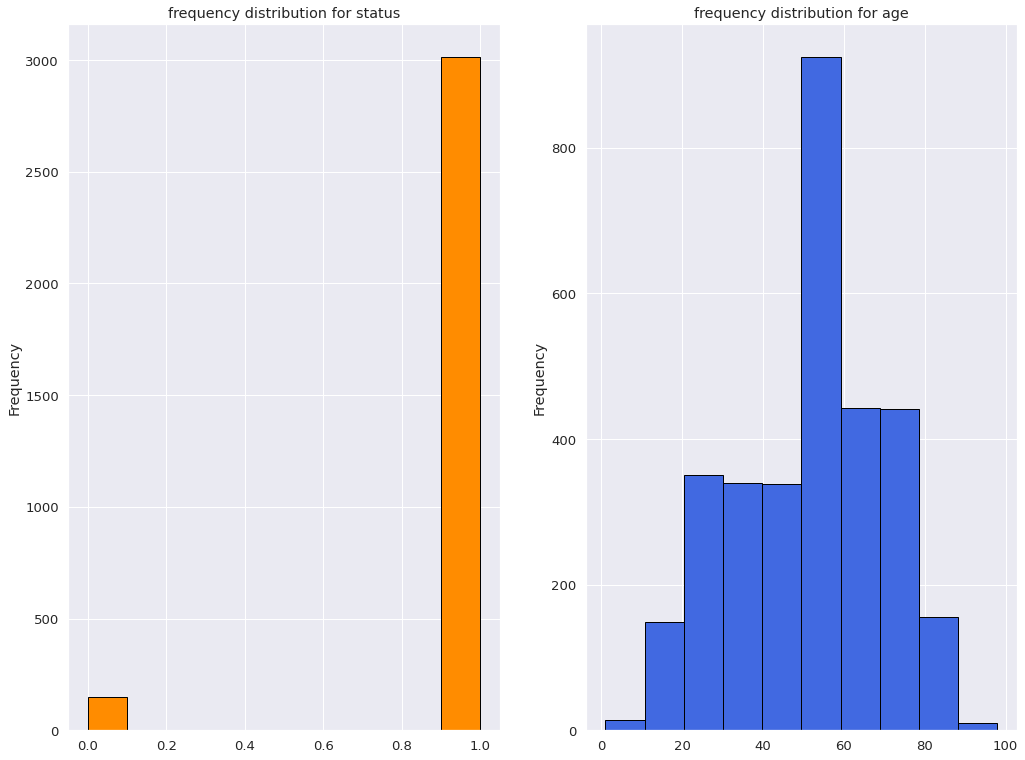

In [17]:
# Histogram to show the distribution of status and age
fig, ax = plt.subplots(1,2, figsize=(17, 13))
thyroid['status'].plot.hist(ax=ax[0], bins=10, edgecolor='black', color='darkorange')
ax[0].set_title('frequency distribution for status')

thyroid['age'].plot.hist(ax=ax[1], bins=10, edgecolor='black', color='royalblue')
ax[1].set_title('frequency distribution for age')

plt.show()

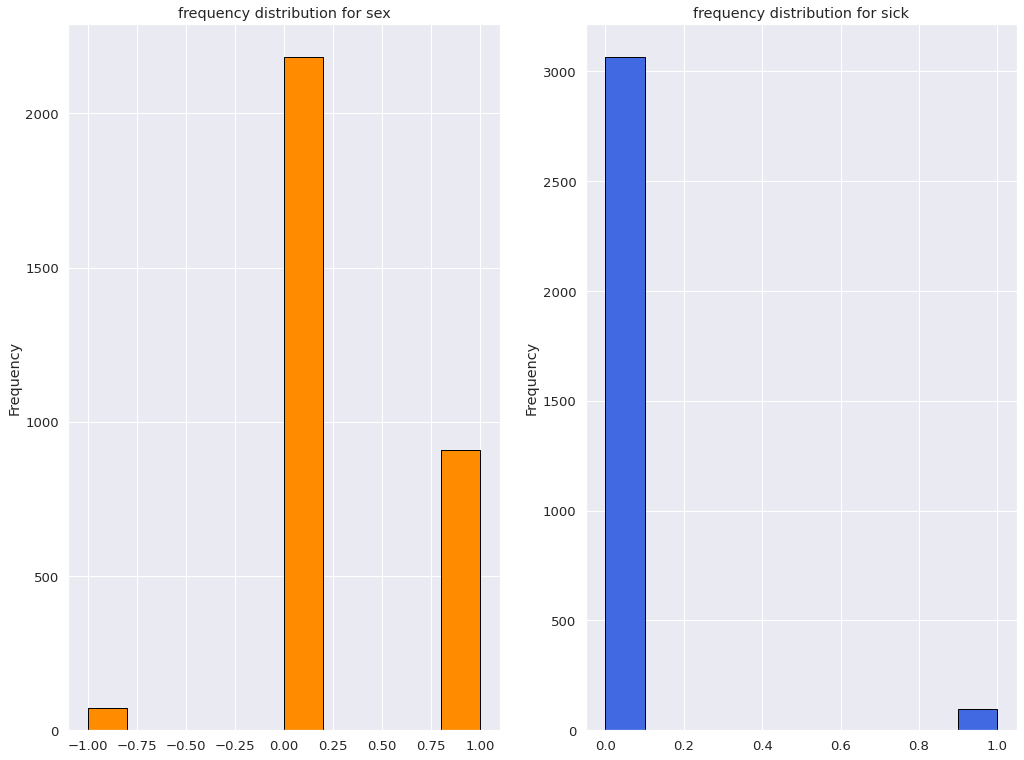

In [18]:
# Histogram to show the distribution of sex and sick
fig, ax = plt.subplots(1,2, figsize=(17, 13))
thyroid['sex'].plot.hist(ax=ax[0], bins=10, edgecolor='black', color='darkorange')
ax[0].set_title('frequency distribution for sex')

thyroid['sick'].plot.hist(ax=ax[1], bins=10, edgecolor='black', color='royalblue')
ax[1].set_title('frequency distribution for sick')

plt.show()

In [19]:
# measures of dispersion
thyroid.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3,TT4_measured,TT4,T4U
count,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000
mean,0.952261,51.154214,0.263990,0.145748,0.017389,0.013279,0.076193,0.076826,0.019918,0.031299,0.012646,0.000632,0.031299,0.852039,43.273158,15.925387,0.921277,118.097060,60.606702
std,0.213248,17.881969,0.490443,0.352909,0.130735,0.114483,0.265349,0.266357,0.139740,0.174153,0.111760,0.025142,0.174153,0.355117,58.098653,12.350720,0.269348,106.539679,27.771583
min,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000
25%,1.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,6.000000,1.000000,16.000000,50.000000
50%,1.000000,51.154214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,21.000000,17.000000,1.000000,69.000000,62.000000
75%,1.000000,64.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,54.000000,24.000000,1.000000,240.000000,73.000000
max,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,238.000000,68.000000,1.000000,267.000000,157.000000


In [20]:
# frequency table for TSH
thyroid.TSH.value_counts()


 0      894
-1      468
 41      76
 33      75
 35      69
       ... 
 45       1
 55       1
 59       1
 61       1
 238      1
Name: TSH, Length: 240, dtype: int64

In [21]:
# frequency count for T3
thyroid.T3.value_counts()

-1     695
 19    141
 17    141
 23    139
 18    138
      ... 
 66      1
 65      1
 21      1
 57      1
 0       1
Name: T3, Length: 70, dtype: int64

In [22]:
# mode for the data
thyroid.mode()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3,TT4_measured,TT4,T4U
0,1,51.154214,0,0,0,0,0,0,0,0,0,0,0,1,0,-1,1,-1,-1


In [23]:
# checking for the skewness of the data
thyroid.skew()
# majority of the data is positively skewed, while a few variables are negatively skewed

status                       -4.244318
age                          -0.175276
sex                           0.468001
on_thyroxine                  2.008884
query_on_thyroxine            7.387730
on_antithyroid_medication     8.508327
query_hypothyroid             3.196349
query_hyperthyroid            3.179507
pregnant                      6.875427
sick                          5.386030
tumor                         8.726972
lithium                      39.749202
goitre                        5.386030
TSH_measured                 -1.983919
TSH                           1.448024
T3                            0.464046
TT4_measured                 -3.130104
TT4                           0.255200
T4U                          -0.080361
dtype: float64

In [24]:
# checking for kurtosis
thyroid.kurt()

status                         16.024369
age                            -0.625620
sex                            -0.465073
on_thyroxine                    2.036901
query_on_thyroxine             52.611814
on_antithyroid_medication      70.436172
query_hypothyroid               8.221847
query_hyperthyroid              8.114398
pregnant                       45.300146
sick                           27.026406
tumor                          74.206957
lithium                      1578.997469
goitre                         27.026406
TSH_measured                    1.937159
TSH                             1.232397
T3                              0.621095
TT4_measured                    7.802486
TT4                            -1.733908
T4U                             1.439021
dtype: float64

Bivariate Analysis

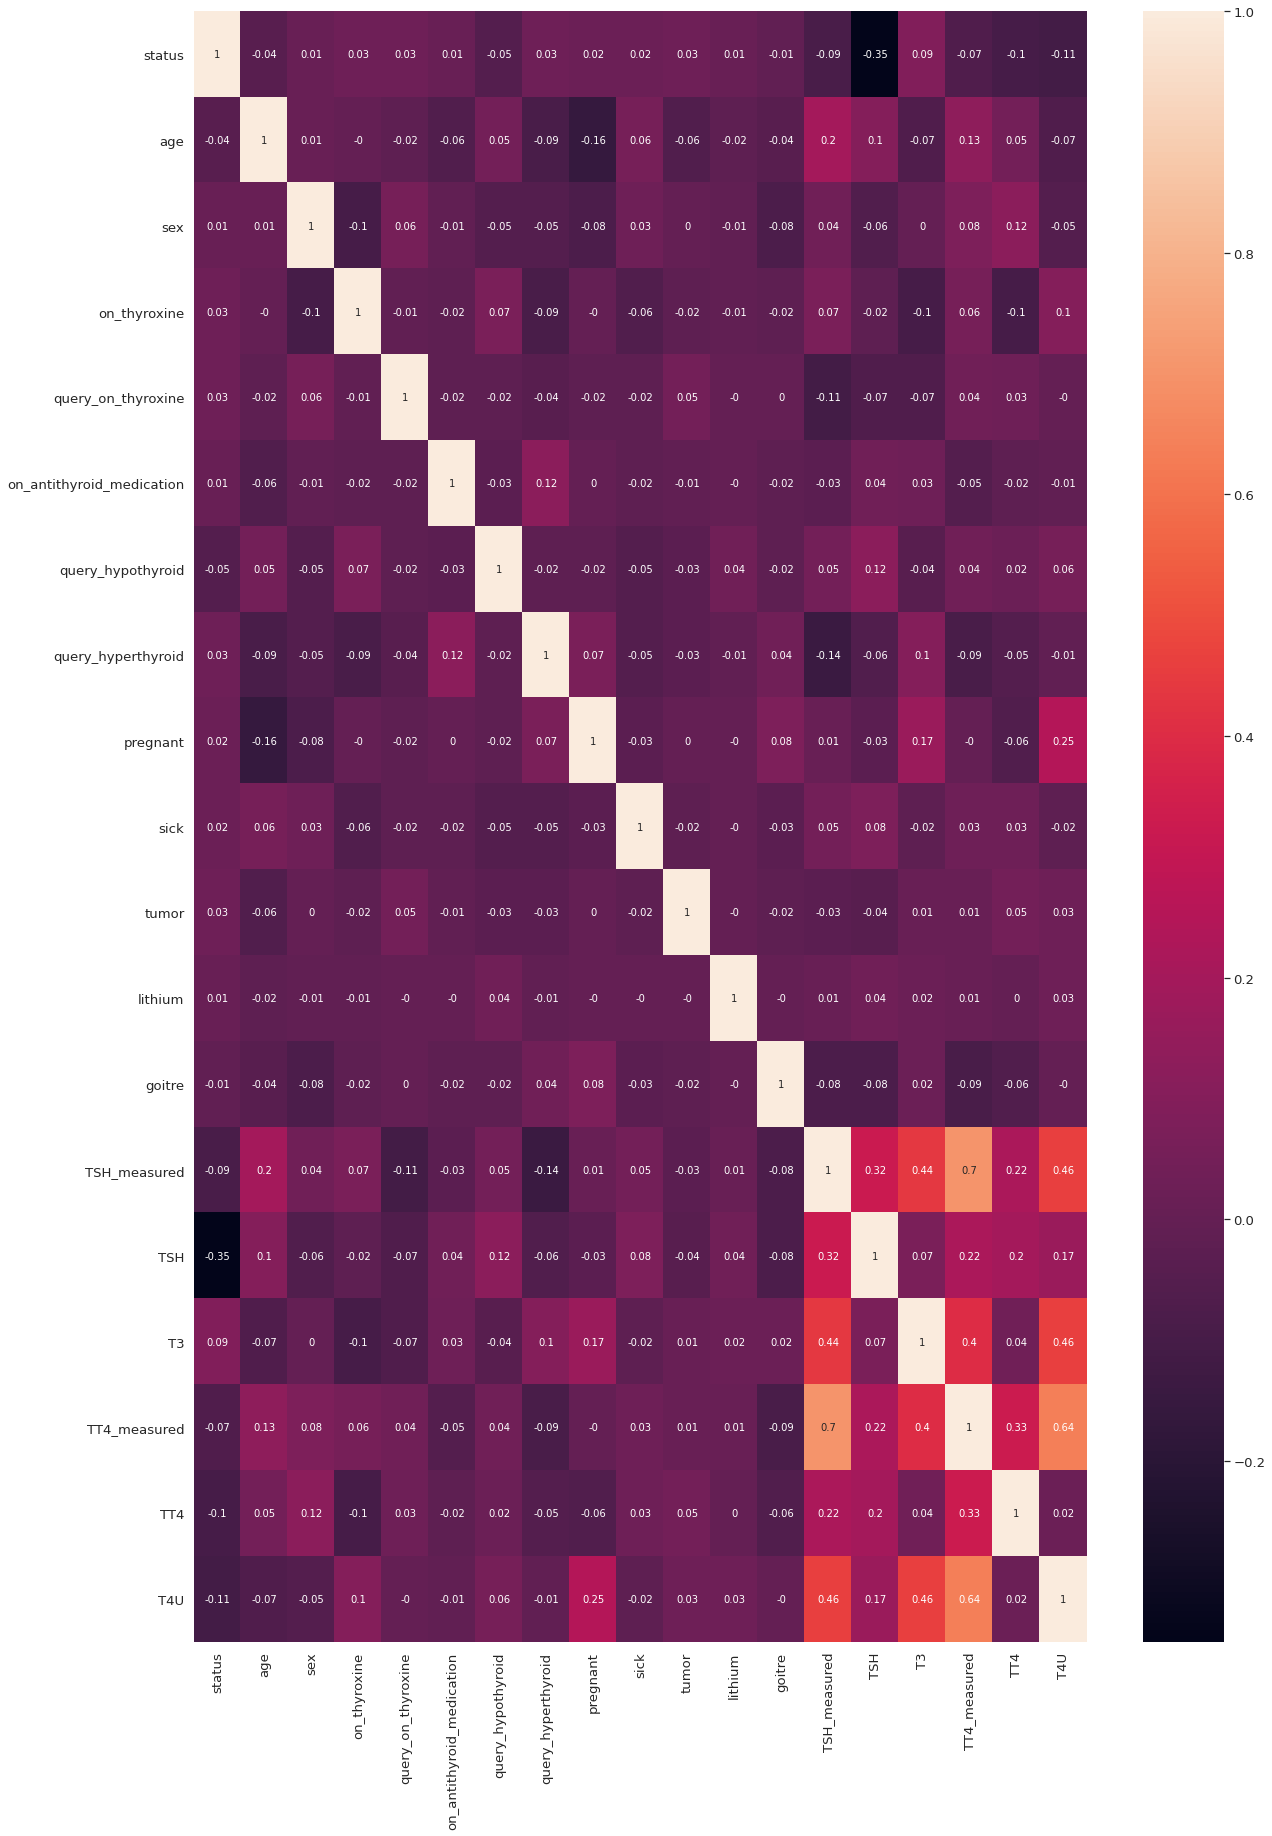

In [25]:
# checking for the correlations 
plt.figure(figsize=(20,30))
sns.heatmap(round(thyroid.corr(),2), annot=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

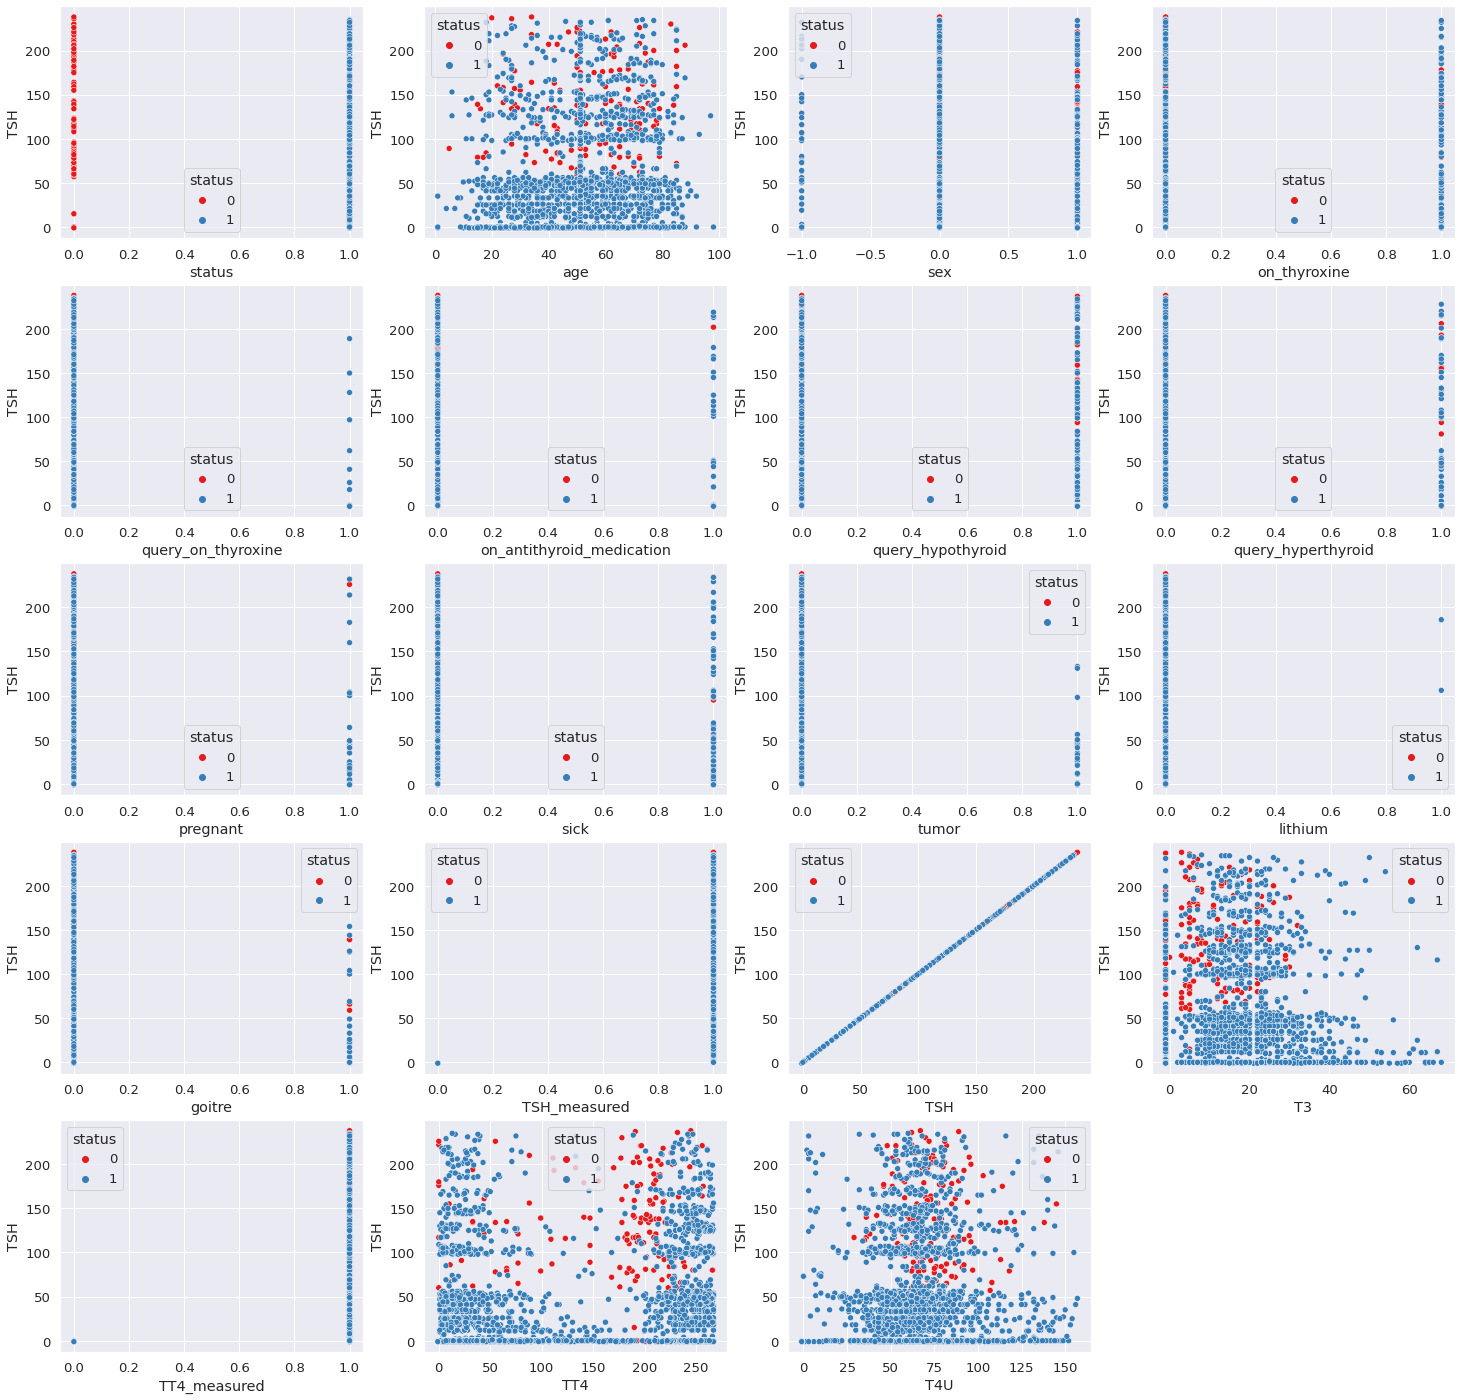

In [26]:
plt.figure(figsize=(25,35))
# for loop to make a scatterplot for each numerical column against TSH 
for variable,i in columns_dict.items():
  plt.subplot(7,4,i)
  x = thyroid[variable]
  y = thyroid['TSH']
  sns.scatterplot(thyroid[variable], thyroid['TSH'], palette='Set1', hue=thyroid['status'])
  plt.xlabel(variable)
  plt.ylabel('TSH')


the red dots(0) indicate a patient has hyperthroid.
as seen from the visualizations, high levels of TT4 and T4U is a major indicator of hyperthyroid.

Modeling

Random Forest

In [27]:
from sklearn.model_selection import train_test_split
# split the independent and dependant variables
# we want to predict if a patient has hypothyroid
y = thyroid['status'].values

test_features = thyroid.columns.to_list()
test_features.remove('status')


# using the features
X = thyroid[test_features].values

# train using 80% of the features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Import the model
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()


,Actual,Predicted
count,633.000000,633.000000
mean,0.958926,0.998420
std,0.198619,0.039746
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [28]:
from sklearn import metrics

#  assess how well our model performs 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.03949447077409163
Mean Squared Error: 0.03949447077409163
Root Mean Squared Error: 0.19873215837929106


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


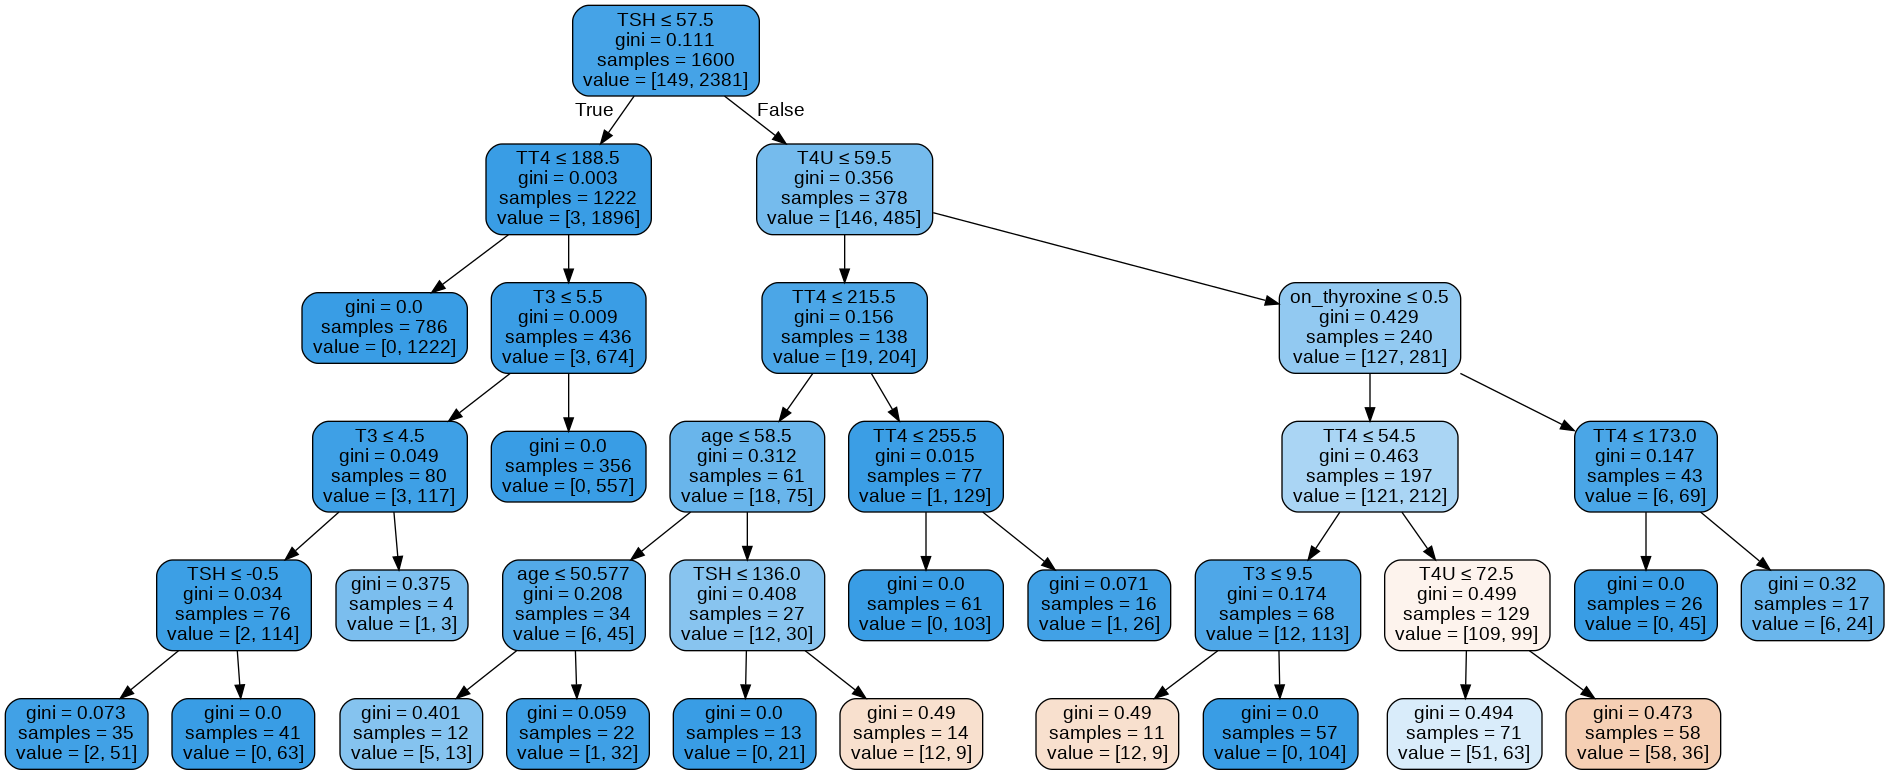

In [29]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('thyroid_forest.png')
Image(graph.create_png())

In [30]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.02), ('sex', 0.0), ('on_thyroxine', 0.07), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.0), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH_measured', 0.0), ('TSH', 0.43), ('T3', 0.09), ('TT4_measured', 0.0), ('TT4', 0.25), ('T4U', 0.13)]

Variable: TSH                  Importance: 0.43
Variable: TT4                  Importance: 0.25
Variable: T4U                  Importance: 0.13
Variable: T3                   Importance: 0.09
Variable: on_thyroxine         Importance: 0.07
Variable: age                  Importance: 0.02
Variable: sex                  Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: on_antithyroid_medication Importance: 0.0
Variable: query_hypothyroid    Importance: 0.0
Variable: query_hyperthyroid   Importance: 0.0
Variable: pregnant             Importance: 0.0
Variable: sick                 Importance: 0.0
Variable: t

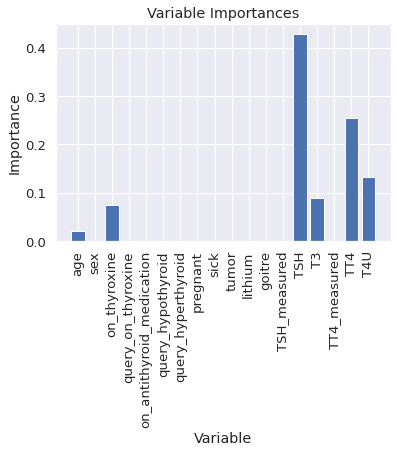

In [31]:
# visualizing the important features
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

# if we are trying to predict if a patient has hypothyroid, we only need two features, that is TSH and TT4

The most important features include TSH, T3,TT4, T4U, age, and finally the on_thyroxine. 

Gradient Boosting Regression

In [32]:
# Data preprocessing
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
# initiate the gradient boosting regressor fitting the regression model
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [33]:
#checking the MSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.0226


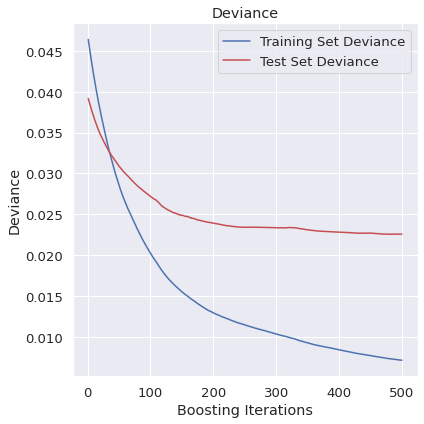

In [34]:
# visualizing the results
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

Support Vector Machines

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


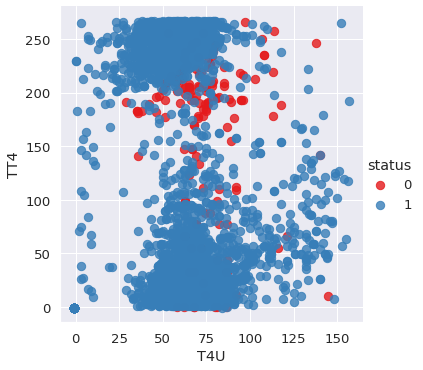

In [35]:
# plotting our desired features for SVM
sns.lmplot('T4U', 'TT4', data=thyroid, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s":70})

In [36]:
from sklearn.svm import SVC,LinearSVC

# Fit the model
# Specify the input for the model

TT4_T4U = thyroid[['TT4', 'T4U',]].values
type_label = thyroid['status'] 
# Fit the model
model = SVC(kernel= 'linear')
model.fit(TT4_T4U,type_label)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


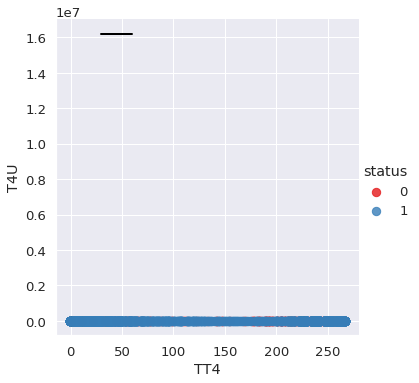

In [38]:
# Get the separating hyperplane
w = model.coef_[0] #get the first coefficient of our model
a = -w[0] / w[1]
# Get the x values of our hyperplane. We achieve this by creating a range numbers from the largest number of the butter vlaues and the smallest number of the butter values.  
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the hyperplane
sns.lmplot('TT4', 'T4U', data=thyroid, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

In [ ]:
# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# Look at the margins and support vectors
sns.lmplot('T4U', 'TT4', data=thyroid, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--') #'k--' indicates that we want to draw a black dotted line
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],s=80, facecolors='none');